In [172]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [173]:
# Read the CSV file
df = pd.read_csv(r"C:\Shubh Projects DS\Copper\Copper_Set.xlsx - Result 1.csv")

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [174]:
df.shape


(181673, 14)

In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [176]:
#checking the null values in this dataframe
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [177]:
#checking the unique values of the all columns

for i in df.columns:
  print(i,":",df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [178]:
df.dtypes


id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [179]:
#converting the datatypes
# item_dat, delivery date, quantity tons

df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date_1"]= pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date_1"]= pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [180]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181671 non-null  object 
 1   item_date        181672 non-null  float64
 2   quantity tons    181672 non-null  float64
 3   customer         181672 non-null  float64
 4   country          181645 non-null  float64
 5   status           181671 non-null  object 
 6   item type        181673 non-null  object 
 7   application      181649 non-null  float64
 8   thickness        181672 non-null  float64
 9   width            181673 non-null  float64
 10  material_ref     103754 non-null  object 
 11  product_ref      181673 non-null  int64  
 12  delivery date    181672 non-null  float64
 13  selling_price    181672 non-null  float64
 14  item_date_1      181670 non-null  object 
 15  delivery_date_1  181670 non-null  object 
dtypes: float64(9), int64(1), object(6)
mem

In [181]:
df.isnull().sum()


id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery_date_1        3
dtype: int64

In [182]:
#removing the "00000" datas in the "material_ref" column
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [183]:
df.isnull().sum()


id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery_date_1         3
dtype: int64

In [184]:
df.drop(columns=["id","material_ref"],inplace=True)


In [185]:
df.isnull().sum()


item_date           1
quantity tons       1
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       1
item_date_1         3
delivery_date_1     3
dtype: int64

In [186]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [187]:
#quantity tons and selling_price have a negative values,
# so we need to replace the negative values

#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [188]:
df.nunique()


item_date             252
quantity tons      181668
customer             1169
country                17
status                  9
item type               7
application            30
thickness             594
width                1386
product_ref            33
delivery date          28
selling_price        9789
item_date_1           250
delivery_date_1        26
dtype: int64

In [189]:
df.isnull().sum()


item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery_date_1     3
dtype: int64

In [190]:
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery_date_1"].fillna(df["delivery_date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)
# object columns and mode method

In [191]:
df.isnull().sum()


item_date           0
quantity tons       5
customer            1
country            28
status              0
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       0
selling_price       8
item_date_1         0
delivery_date_1     0
dtype: int64

In [192]:
#numarical column and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [193]:
df.isnull().sum()


item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [194]:
df.head(5)


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [195]:
df["status"].unique()


array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [196]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [197]:
df["status"].unique()


array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [198]:
df["item type"].unique


<bound method Series.unique of 0          W
1          W
2         WI
3          S
4          W
          ..
181668     W
181669     W
181670     W
181671     W
181672     W
Name: item type, Length: 181673, dtype: object>

In [199]:
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])


In [200]:
df["item type"].unique()


array([5., 6., 3., 1., 2., 0., 4.])

In [201]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [202]:
df.to_csv("Industrial_Copper_proper.csv", index= False)


Handling the skewness using (Log Transfermation)



In [203]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.displot(df[column])
  plt.title("distplot for"+" "+column)

In [204]:
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

In [205]:
#for i in skewed_columns:
  #plot(df,i)

Skewed columns:
1.quantity tons
2.customer
3.thickness
4.selling_price

In [206]:
df1= df.copy()


In [207]:
df1.columns


Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [208]:
df1["quantity_tons_log"]= np.log(df1["quantity tons"])
df1["customer_log"]= np.log(df1["customer"])
df1["thickness_log"]= np.log(df1["thickness"])
df1["selling_price_log"]= np.log(df1["selling_price"])

In [209]:
skwed_columns_2=["quantity_tons_log","customer_log","thickness_log","selling_price_log"]


In [210]:
#for i in skwed_columns_2:
 #plot(df1,i)

Outliers Handling - Interquartile Range(IQR) Method



In [211]:
df2= df1.copy()


In [212]:
df2.head()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


IQR



In [213]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

(Ex: lower threshold = 5 and upper threshold = 20)
above upper threshold values (>20) are converted to upper threshold value (20) in features
below lower threshold values (<5) are converted to lower threshold value (5) in features

In [214]:
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [215]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']


In [216]:
#for i in outlier_columns:
  #outlier(df2,i)

In [217]:
#Droping the unwanted skewed columns
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

df3= df2.drop(columns=["quantity tons","customer","thickness","selling_price"])
     

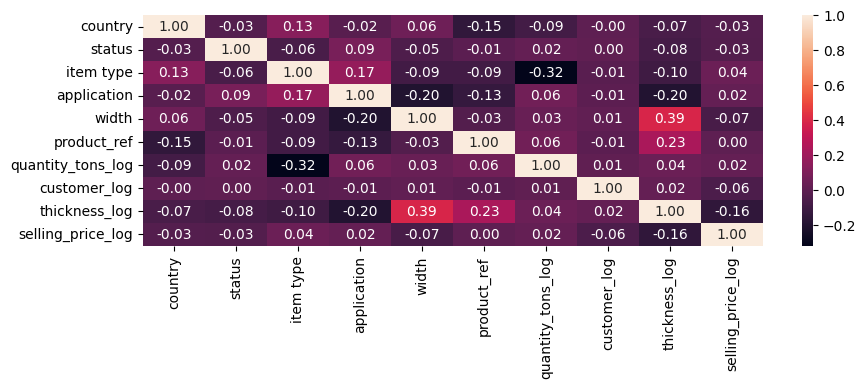

In [218]:
#Checking the correlation with using the heatmap

corr= df3.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

Wrong delivery date handling using ML prediction



In [219]:
df4= df3.copy()


In [220]:
df4.head(5)


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [221]:
df4.dtypes


item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [222]:
#converting the datatype (object to datetime format)
df4["delivery_date_1"]= pd.to_datetime(df4["delivery_date_1"])
df4["item_date_1"]= pd.to_datetime(df4["item_date_1"])

In [223]:
#identifying the difference of the "delivery date" and the "item date"
df4["date_differ"]= (df4["delivery_date_1"]-df4["item_date_1"]).dt.days

In [224]:
df4["date_differ"]

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181673, dtype: int64

some values have a negative values
it's mean the "delivery date provides , the previous date then the "item date"
so this is not possible , so we want to predic the delivery date for the some datas

In [225]:
#creating the another 3 columns using the "item_date_1"
# it is usefull for the delivery date prediction
df4["item_date_day"]= df4["item_date_1"].dt.day
df4["item_date_month"]= df4["item_date_1"].dt.month
df4["item_date_year"]= df4["item_date_1"].dt.year

In [226]:
df4.head(5)


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [227]:
#separating the posive values(pv) dataframe and negative values(nv) dataframe based on the "date_differ" column
df4_pv= df4[df4["date_differ"]>=0]
df4_pv.reset_index(drop= True, inplace= True)

In [228]:
df4_pv.tail()


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
165560,20200702.0,25.0,0,3.0,15.0,2000.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [229]:
df4_nv= df4[df4["date_differ"]<0]
df4_nv.reset_index(drop= True, inplace= True)

In [230]:
df4_nv.tail()


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [231]:
# now we want to create the model for delivery date prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [232]:
df4_pv.columns


Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [233]:
def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= df["date_differ"]


 #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)


  model= algorithm().fit(x_train,y_train)
  y_pred=model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)
  
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Absolute Error (MAE):", mae)
  print("R-squared (R2) Score:", r2)



  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics

In [234]:
print(accuracy_date_prediction(df4_pv,DecisionTreeRegressor))


Mean Squared Error (MSE): 4.865128499380908
Root Mean Squared Error (RMSE): 2.205703629090025
Mean Absolute Error (MAE): 0.01633799414127382
R-squared (R2) Score: 0.9968642174572448
{'R2_score': 0.9968642174572448, 'Mean_squared_error': 4.865128499380908, 'Root_mean_squared_error': 2.205703629090025, 'Mean_absolute_error': 0.01633799414127382}


In [235]:
print(accuracy_date_prediction(df4_pv,RandomForestRegressor))


Mean Squared Error (MSE): 4.377897568930632
Root Mean Squared Error (RMSE): 2.092342603143814
Mean Absolute Error (MAE): 0.017405248693866466
R-squared (R2) Score: 0.9971782585449964
{'R2_score': 0.9971782585449964, 'Mean_squared_error': 4.377897568930632, 'Root_mean_squared_error': 2.092342603143814, 'Mean_absolute_error': 0.017405248693866466}


In [236]:
print(accuracy_date_prediction(df4_pv,ExtraTreesRegressor))


Mean Squared Error (MSE): 1.2079825778395197
Root Mean Squared Error (RMSE): 1.0990826073774072
Mean Absolute Error (MAE): 0.016812430163379976
R-squared (R2) Score: 0.9992214037758667
{'R2_score': 0.9992214037758667, 'Mean_squared_error': 1.2079825778395197, 'Root_mean_squared_error': 1.0990826073774072, 'Mean_absolute_error': 0.016812430163379976}


In [237]:
print(accuracy_date_prediction(df4_pv,GradientBoostingRegressor))


Mean Squared Error (MSE): 18.779559880583225
Root Mean Squared Error (RMSE): 4.33353895570159
Mean Absolute Error (MAE): 2.9479455992502714
R-squared (R2) Score: 0.9878957737618542
{'R2_score': 0.9878957737618542, 'Mean_squared_error': 18.779559880583225, 'Root_mean_squared_error': 4.33353895570159, 'Mean_absolute_error': 2.9479455992502714}


In [238]:
print(accuracy_date_prediction(df4_pv,AdaBoostRegressor))


Mean Squared Error (MSE): 394.22827775008267
Root Mean Squared Error (RMSE): 19.855182642073142
Mean Absolute Error (MAE): 15.997600276888381
R-squared (R2) Score: 0.7459030832615354
{'R2_score': 0.7459030832615354, 'Mean_squared_error': 394.22827775008267, 'Root_mean_squared_error': 19.855182642073142, 'Mean_absolute_error': 15.997600276888381}


In [239]:
print(accuracy_date_prediction(df4_pv,XGBRegressor))


Mean Squared Error (MSE): 1.5098560346641128
Root Mean Squared Error (RMSE): 1.228761992683739
Mean Absolute Error (MAE): 0.19897437494128226
R-squared (R2) Score: 0.9990268349647522
{'R2_score': 0.9990268349647522, 'Mean_squared_error': 1.5098560346641128, 'Root_mean_squared_error': 1.228761992683739, 'Mean_absolute_error': 0.19897437494128226}


Random Forest algorithm is low bias and reduce overfitting compared to others.

In [240]:
def RandomForest(train_df, test_df):

  x= train_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= train_df["date_differ"]

  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  data= test_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])

  y_pred=model.predict(data)

  return y_pred

# Model for the RandomForest

In [241]:
date_difference= RandomForest(df4_pv,df4_nv)


In [242]:
date_difference


array([16.37, 16.34,  0.  , ..., 30.  , 30.  , 30.  ])

In [243]:
# changing the "date_differ" datatype float into int
date_difference_1= []
for i in date_difference:
  dd= int(round(i,0))
  date_difference_1.append(dd)

In [244]:
df4_nv["date_differ"]= pd.DataFrame(date_difference_1)


In [245]:
df4_nv.isnull().sum()


item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery_date_1      0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [246]:
#find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, date_differ):
  date= item_date + pd.to_timedelta(date_differ,unit= "D")
  return date

In [247]:
df4_nv["delivery_date_1"]= find_delivery_date(df4_nv["item_date_1"],df4_nv["date_differ"])


In [248]:
# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows
df_final=pd.concat([df4_pv,df4_nv],axis=0,ignore_index=True)     

In [249]:
df_final.tail()


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [250]:
# Now we create the three new columns using the "delivery_date_1"
df_final['delivery_date_day']= df_final["delivery_date_1"].dt.day
df_final['delivery_date_month']= df_final["delivery_date_1"].dt.month
df_final['delivery_date_year']= df_final["delivery_date_1"].dt.year

In [251]:
df_final.head(2)


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021


In [252]:
df_final.columns


Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [253]:
# Droping the unwanted columns
df_final.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1","date_differ"],inplace=True)     

In [254]:
df_final.columns


Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [255]:
#Saveing the dataframe
df_final.to_csv("Industrial_Copper_Colab.csv",index= False)

In [256]:
#Reading the saved "csv" file
df_final= pd.read_csv("C:\Shubh Projects DS\Industrial_Copper_Colab.csv")

In [257]:
df_final.head(9)


,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,2.890372,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
5,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
6,30.0,2,5.0,41.0,1125.0,611993,2.216566,17.223667,-0.967584,2.833213,1,4,2021,1,7,2021
7,78.0,1,5.0,10.0,1250.0,164141591,3.314642,17.222210,-0.287682,7.001246,1,4,2021,1,7,2021
8,27.0,1,3.0,10.0,1010.0,628377,3.473063,17.223431,-0.510826,6.880384,1,4,2021,1,7,2021


This DataFrame don't have any null values and catagorical columns
so our dataset is ready to the ML prediction
Classification Method - Predict (Won/Lost)

In [258]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [259]:
df_class= df_final.copy()


In [260]:
# filter the status column only want to be a (won& loss)
df_c= df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]

In [261]:
df_c.tail()


,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [262]:
df_c["status"].value_counts()


status
1    116012
0     34438
Name: count, dtype: int64

This is a imbalanced data
so we want to resampling the data by usin the "SMOTETomek" (Synthetic Minority Over-sampling Technique)

In [263]:
df_c.columns


Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [264]:
x= df_c.drop(columns=["status"],axis=1)
y= df_c["status"]

In [265]:
x.shape,y.shape


((150450, 15), (150450,))

In [266]:
x_new,y_new= SMOTETomek().fit_resample(x,y)


In [267]:
x_new.shape,y_new.shape


((230156, 15), (230156,))

In [268]:
y_new.value_counts()


status
1    115078
0    115078
Name: count, dtype: int64

now the data is balanced
so, we continue the ML prediction

In [269]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [270]:
print(accuracy_checking(x,y,DecisionTreeClassifier))


{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9513791957460951}


In [271]:
print(accuracy_checking(x,y,RandomForestClassifier))


{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.969757394483217}


In [272]:
print(accuracy_checking(x,y,ExtraTreesClassifier))


{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9751412429378531}


In [273]:
print(accuracy_checking(x,y,AdaBoostClassifier))


{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8145563310069791, 'Accuracy_Test': 0.8125955466932536}


In [274]:
print(accuracy_checking(x,y,GradientBoostingClassifier))


{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8364739115985377, 'Accuracy_Test': 0.8332668660684612}


In [275]:
print(accuracy_checking(x,y,XGBClassifier))


{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9451395812562313, 'Accuracy_Test': 0.9316051844466601}


accuaccuracy_checking for x_new,y_new


In [276]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))


{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9641336461591936}


In [277]:
print(accuracy_checking(x_new,y_new,RandomForestClassifier))


{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.981621480709072}


In [278]:
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))


{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9852711157455682}


In [279]:
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))


{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7753579109730399, 'Accuracy_Test': 0.7763077858880778}


In [280]:
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))


{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8186819751906323, 'Accuracy_Test': 0.8214937434827946}


In [281]:
print(accuracy_checking(x_new,y_new,XGBClassifier))


{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.953145706154548, 'Accuracy_Test': 0.9479275286757038}


we got good accuracy after oversampling
ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy
RandomForestClassifier is good interpretability, so i am selecting the algorithm

In [282]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model = RandomForestClassifier()

model.fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

In [283]:
accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test)) 

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  1.0
Accuracy_Test:  0.9815780326729232
  
Confution_matrix for Test
--------------------------
[[22730   272]
 [  576 22454]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     23002
           1       0.99      0.97      0.98     23030

    accuracy                           0.98     46032
   macro avg       0.98      0.98      0.98     46032
weighted avg       0.98      0.98      0.98     46032



In [284]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lost")

Won


In [285]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [286]:
with open("C:\Shubh Projects DS\Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

Regression Method - Predict the Selling Price


In [287]:
df_regg= df_final.copy()


In [288]:
x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

model_r = RandomForestRegressor()

model_r.fit(x_train,y_train)

y_pred_train= model_r.predict(x_train)
y_pred_test= model_r.predict(x_test)


r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9976517375642944, 0.9764474506274305)

In [289]:
x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


model_r = RandomForestRegressor()

model_r.fit(x_train,y_train)
y_pred = model_r.predict(x_test)

In [290]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9764915011954368,
 'Mean Absolute Error': 0.03489519854898191,
 'Mean Squared Error': 0.007784458857446755,
 'Root Mean Squared Error': 0.08822958039935787}

In [291]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.224993537761464
Predicted selling price without Log:  1373.3297408161413


In [292]:
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)

In [293]:
with open("C:\Shubh Projects DS\Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [294]:
df_final.head()


,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,2.890372,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


In [295]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.875416056217504
Predicted selling price without Log:  968.1780983165943


INDUSTRIAL COPPER MODELING
PREDICT STATUS (Won / Lost)
Enter the Value for COUNTRY/ Min:25.0, Max:113.0

77.00


Enter the Value for ITEM TYPE/ Min:0.0, Max:6.0

3.00


Enter the Value for APPLICATION/ Min:2.0, Max:87.5

10.00


Enter the Value for WIDTH/ Min:700.0, Max:1980.0

1500.00


Enter the Value for PRODUCT_REF/ Min:611728, Max:1722207579

164141591.00


Enter the Value for QUANTITY_TONS (Log Value)/ Min:-0.322, Max:6.924

3.677655000000000


Enter the Value for CUSTOMER (Log Value)/ Min:17.21910, Max:17.23015

17.222225999999999


Enter the Value for THICKNESS (Log Value)/ Min:-1.71479, Max:3.28154

0.000000000000000


Enter the Value for SELLING PRICE (Log Value)/ Min:5.97503, Max:7.39036

7.110000000000000


Select the Day for ITEM DATE

1
Select the Month for ITEM DATE

4
Select the Year for ITEM DATE

2021
Select the Day for DELIVERY DATE

1
Select the Month for DELIVERY DATE

8
Select the Year for DELIVERY DATE

2021

The Status is LOST